# Differencing between surveyed elevations and grain size properties

In [105]:
import numpy as np
import pylab as plt

In [128]:
# fn1 = "15_10_2018_A.txt" # init array
# fn2 = "16_10_2018_A.txt"
# fn3 = "17_10_2018_A.txt" # dense array 1
# fn4 = "18_10_2018_A.txt"
# fn5 = "19_10_2018_A.txt"
# fn6 = "20_10_2018_A.txt"
# fn7 = "21_10_2018_A.txt" # dense array 2
# fn8 = "21_10_2018_B.txt"
# fn9 = "21_10_2018_B_longshore1.txt"
# fn10 = "22_10_2018_A.txt"
# fn11 = "22_10_2018_A_longshore1.txt"
# fn12 = "22_10_2018_B.txt"
# fn13 = "22_10_2018_B_longshore1.txt"
# fn14 = "23_10_2018_A.txt"
# fn15 = "23_10_2018_A_longshore1.txt"
# fn16 = "23_10_2018_B.txt"
# fn17 = "23_10_2018_B_longshore1.txt"

# RTK
dn = "C:\\Projects\\AdvocateBeach2018\\data\\interim\\GPS\\"    
# fn = ["15_10_2018_A.txt", "16_10_2018_A.txt", "17_10_2018_A.txt", "18_10_2018_A.txt", "19_10_2018_A.txt",\
#       "20_10_2018_A.txt", "21_10_2018_A.txt", "21_10_2018_B.txt", "22_10_2018_A.txt", "22_10_2018_B.txt",\
#       "23_10_2018_A.txt", "23_10_2018_B.txt"]
fn = ["18_10_2018_A.txt", "19_10_2018_A.txt", "20_10_2018_A.txt", "21_10_2018_A.txt", "21_10_2018_B.txt", \
      "22_10_2018_A.txt", "22_10_2018_B.txt"]

# grid = [1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
grid = [2, 2, 2, 2, 2, 2, 2]


# grain size
days = ["18_10_2018", "19_10_2018", "20_10_2018", "21_10_2018", "21_10_2018", "22_10_2018", "22_10_2018"]
tides = ["AM","AM","AM","AM","PM","AM","PM"]
grid_spec = "cross_shore"

In [129]:
def import_RTK(fname, gridnum):
    
    with open(fname, 'rb') as f:
        clean_lines = ( line.replace(b'STK',b'').replace(b' ',b',') for line in f )
        data = np.genfromtxt(clean_lines,usecols=(0,1,2,3,4,),delimiter=',')

    # UTM coords of origin (Adv2015)
    originx = 3.579093296000000e+05;
    originy = 5.022719408400000e+06;

    northing = data[:,1] - originx
    easting = data[:,2] - originy
    elevation = data[:,3]
    stkID = data[:,4]
    
    # indices for each grid type
    Izl = []
    ILl = []
    Ida = []
    
    if gridnum == 1:
        zlineID = list(range(70,101))
        LlineID = list(range(284,360))

        # took me a while to figure out this indexing -- hang on to this
        for stk in stkID:
            if stk in zlineID:
                Izl.append(list(np.where(stkID==stk))[0][0])
            if stk in LlineID:
                ILl.append(list(np.where(stkID==stk))[0][0])
                
    elif gridnum == 2:     
    
        zlineID = list(range(145,175))
        LlineID = list(range(176,202))
        denseID = list(range(1,145))

        for stk in stkID:
            if stk in zlineID:
                Izl.append(list(np.where(stkID==stk))[0][0])
            if stk in LlineID:
                ILl.append(list(np.where(stkID==stk))[0][0])
            if stk in denseID:
                Ida.append(list(np.where(stkID==stk))[0][0]) 
                
    elif gridnum == 3:     
    
        LlineID = list(range(176,202))

        for stk in stkID1:
            if stk in LlineID:
                ILl.append(list(np.where(stkID==stk))[0][0])      
    
    zline = (northing[Izl], easting[Izl], elevation[Izl])
    longshore = (northing[ILl], easting[ILl], elevation[ILl])
    dense_array = (northing[Ida], easting[Ida], elevation[Ida])
            
    return zline, longshore, dense_array     


In [130]:
def gsize_stats(fname):

    import csv

    with open(fname, 'rt') as f:

        readCSV = csv.reader(f, delimiter=',')
        skewness = []
        mean_gsize = []
        percentiles = []
        percentile_vals = []
        gsize_freqs = []
        gsize_bins = []
        sorting = []
        kurtosis = []

        for col in readCSV:

            skewness.append(col[0])
            mean_gsize.append(col[1])
            percentiles.append(col[2])
            percentile_vals.append(col[3])
            gsize_freqs.append(col[4])
            gsize_bins.append(col[5])
            sorting.append(col[6])
            kurtosis.append(col[7])
            
        return skewness, mean_gsize, percentiles, percentile_vals, gsize_freqs, gsize_bins, sorting, kurtosis


In [131]:
def reformat_gsize_stats(day,tide,grid_specs):

    import glob

    dn = "C:\\Projects\\AdvocateBeach2018\\data\\processed\\grainsize_dists\\" \
        + day + "\\" + tide + "\\" + grid_specs + "\\"

    skew_vec = []
    mean_gsize_vec = []
    sort_vec = []
    kurt_vec = []

    for fname in glob.glob(dn + '*.csv'):

        skewness, mean_gsize, percentiles, percentile_vals, gsize_freqs, gsize_bins, sorting, kurtosis = gsize_stats(fname)

        skew_vec.append(float(skewness[1]))
        mean_gsize_vec.append(float(mean_gsize[1]))
        sort_vec.append(float(sorting[1]))
        kurt_vec.append(float(kurtosis[1]))
        
    return mean_gsize_vec, sort_vec, skew_vec, kurt_vec

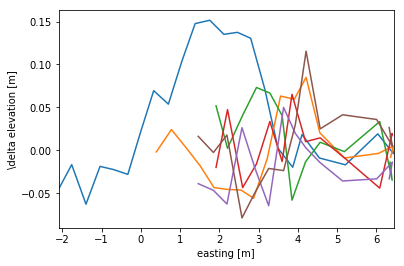

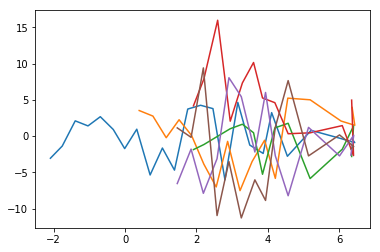

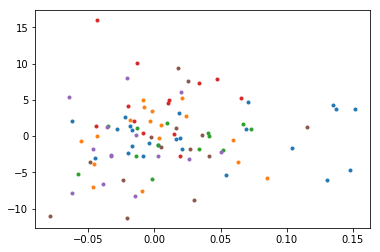

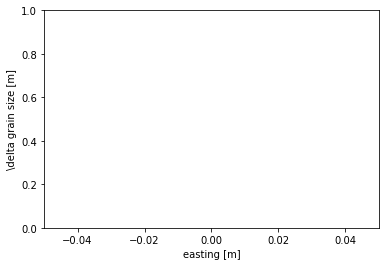

In [143]:
for m in range(0, len(fn)):
    
    # for differencing
    if m > 0:
        last_tide = np.copy(coords)
        last_mean_gsize_vec = np.copy(sort_vec)
    else:
        last_tide = []
        last_mean_gsize_vec = []
    
    coords = import_RTK(dn+fn[m], grid[m])
    mean_gsize_vec, sort_vec, skew_vec, kurt_vec = reformat_gsize_stats(days[m], tides[m], grid_spec)
    
#     if not last_tide:
#         last_tide = np.zeros(np.shape(coords))

# NB: coords[zl,Ll,da][x,y,x]

    if m > 0:
        
        # zero line
        if len(coords[0][2]) > len(last_tide[0][2]):
            dz_a = coords[0][2][0:len(last_tide[0][2])] - last_tide[0][2]
#             dz_L = coords[1][2][0:len(last_tide[1][2])] - last_tide[1][2]
#             dz_d = coords[2][2][0:len(last_tide[2][2])] - last_tide[2][2]
            eas_a = last_tide[0][2]
#             nor_a = last_tide[0][0]
#             eas_L = last_tide[1][1]
#             nor_L = last_tide[1][0]

            # grain size diffs
            dgs_a = sort_vec[0:len(last_tide[0][2])] - last_mean_gsize_vec
    
        else:
            dz_a = coords[0][2] - last_tide[0][2][0:len(coords[0][2])]
#             dz_L = coords[1][2] - last_tide[1][2][0:len(coords[1][2])]
#             dz_d = coords[2][2] - last_tide[2][2][0:len(coords[2][2])]
            eas_a = coords[0][2]
#             nor_a = coords[0][0]
#             eas_L = coords[1][1]
#             nor_L = coords[1][0]

            # grain size diffs
            dgs_a = sort_vec - last_mean_gsize_vec[0:len(coords[0][2])]
    
    
#         plt.figure(3)
#         plt.plot(eas_L, dz_L)
        
        plt.figure(3)
        plt.plot(eas_a, dz_a)
    
#     plt.figure(1)
#     plt.plot(coords[0][0], coords[0][2])
    
#     plt.figure(2)
#     plt.plot(coords[1][0], coords[1][2])

        plt.figure(4)
        plt.plot(eas_a, dgs_a)
        
        plt.figure(5)
        plt.plot(dz_a, dgs_a, '.')
    
# plt.figure(1)
# plt.xlabel('easting [m]')
# plt.ylabel('elevation [m]')
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.show()   

# plt.figure(2)
# plt.xlabel('easting [m]')
# plt.ylabel('elevation [m]')
# plt.autoscale(enable=True, axis='x', tight=True)
# plt.show()

plt.figure(3)
plt.xlabel('easting [m]')
plt.ylabel('\delta elevation [m]')
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()  

plt.figure(4)
plt.xlabel('easting [m]')
plt.ylabel('\delta grain size [m]')
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()  

In [74]:
last_tide = np.zeros(np.shape(coords))
np.shape(coords)
last_tide

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [90]:
coords

((array([ 20.4831,  18.3796,  16.3143,  14.3515,  12.2698,  10.1523,
           8.1712,   6.1596,   4.1246,   2.0838,  -0.09  ,  -2.0015,
          -4.0983,  -6.1096,  -8.2431, -10.1939, -12.3309, -14.3676,
         -16.3381, -18.3398, -20.399 , -22.5174, -24.4902]),
  array([ 22.0269,  19.7284,  17.5904,  15.3533,  13.1984,  10.9452,
           8.8303,   6.5801,   4.4782,   2.2927,  -0.0673,  -2.2318,
          -4.3482,  -6.561 ,  -8.7383, -11.0391, -13.1705, -15.3546,
         -17.4851, -19.7891, -22.0049, -24.2023, -26.3253]),
  array([ 6.3757,  6.4406,  6.0867,  5.2715,  4.6594,  4.2466,  3.8962,
          3.544 ,  3.1935,  2.8473,  2.452 ,  2.11  ,  1.7668,  1.4219,
          1.0432,  0.672 ,  0.2529, -0.1388, -0.4414, -0.8193, -1.1605,
         -1.5147, -1.8273])),
 (array([ 40.0483,  39.2332,  38.4443,  37.8799,  37.2297,  36.361 ,
          35.734 ,  35.0066,  34.1649,  33.5275,  32.7388,  31.9697,
          31.2263,  30.4487,  29.7659,  28.967 ,  28.3013,  27.6104,
          2

In [75]:
coords

((array([ 20.4079,  18.3022,  16.3591,  14.182 ,  12.2563,  10.184 ,
           8.2065,   6.1997,   4.0217,   1.9647,  -0.0401,  -2.0849,
          -4.1063,  -6.12  ,  -8.2394, -10.2702, -12.3148, -14.3763,
         -16.3062, -18.3043, -20.4196, -22.4963, -24.5716, -26.516 ,
         -28.6288, -30.6735, -32.5982, -34.6747, -36.7814, -38.8006]),
  array([ 21.9678,  19.7752,  17.6277,  15.3734,  13.2585,  10.9101,
           8.7216,   6.5324,   4.3926,   2.2257,   0.0517,  -2.2262,
          -4.3177,  -6.4967,  -8.7973, -10.9734, -13.2086, -15.458 ,
         -17.5283, -19.7292, -21.9462, -24.1655, -26.4137, -28.6229,
         -30.8018, -32.9305, -35.1077, -37.3355, -39.5528, -41.8414]),
  array([ 6.3462e+00,  6.4351e+00,  6.0522e+00,  5.1464e+00,  4.6136e+00,
          4.3935e+00,  4.1417e+00,  3.5974e+00,  3.2261e+00,  2.8700e+00,
          2.5217e+00,  2.1695e+00,  1.8298e+00,  1.4619e+00,  1.1167e+00,
          7.4120e-01,  3.7430e-01,  3.0000e-03, -3.3990e-01, -6.9930e-01,
         -

In [78]:
np.zeros((10,)).tolist()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [79]:
last_tide = np.copy(coords)

In [103]:
len(coords[1][2])
# len(last_tide[1][2])

26

In [99]:
coords[1][2][0:len(last_tide[1][2])]
# last_tide[1][2]

array([3.2616, 3.3195, 3.2349, 3.2414, 3.2598, 3.2507, 3.1977, 3.2373,
       3.2439, 3.1994, 3.2481, 3.2767, 3.2352, 3.2348, 3.2914, 3.2561,
       3.1646, 3.2314, 3.1708, 3.1299, 3.1089, 3.0608, 3.1417, 3.0838,
       3.0976, 3.0951])